Load CSV data

In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/weather_clean.csv")

# convert time column
df['last_updated'] = pd.to_datetime(df['last_updated'])

df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


Select one city for forecasting

In [2]:
df['location_name'].value_counts().head(10)


location_name
Kabul           636
Abu Dhabi       636
Lilongwe        636
Antananarivo    636
Nairobi         636
Amman           636
Tokyo           636
Tehran          636
Jakarta         636
Vatican City    636
Name: count, dtype: int64

In [3]:
city = "Tokyo"

city_df = df[df['location_name'] == city].copy()
city_df = city_df.sort_values('last_updated')
city_df = city_df.set_index('last_updated')

city_df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 17:45:00,Japan,Tokyo,35.69,139.69,Asia/Tokyo,1715849100,24.0,75.2,Partly cloudy,20.6,...,15.8,18.4,2,2,04:35 AM,06:40 PM,11:48 AM,12:56 AM,Waxing Gibbous,55
2024-05-16 23:00:00,Japan,Tokyo,35.69,139.69,Asia/Tokyo,1715868000,18.3,64.9,Clear,11.9,...,9.5,11.9,1,1,04:35 AM,06:40 PM,11:48 AM,12:56 AM,Waxing Gibbous,55
2024-05-18 01:00:00,Japan,Tokyo,35.69,139.69,Asia/Tokyo,1715961600,18.0,64.4,Clear,2.5,...,36.8,45.1,2,4,04:34 AM,06:41 PM,12:45 PM,01:21 AM,Waxing Gibbous,64
2024-05-18 23:30:00,Japan,Tokyo,35.69,139.69,Asia/Tokyo,1716042600,20.0,68.0,Clear,6.9,...,62.5,73.9,3,8,04:34 AM,06:42 PM,01:42 PM,01:44 AM,Waxing Gibbous,73
2024-05-19 23:00:00,Japan,Tokyo,35.69,139.69,Asia/Tokyo,1716127200,19.2,66.6,Light rain,5.6,...,96.3,101.4,4,10,04:33 AM,06:42 PM,02:37 PM,02:06 AM,Waxing Gibbous,81


Create time series

<Axes: title={'center': 'Tokyo Temperature Over Time'}, xlabel='last_updated'>

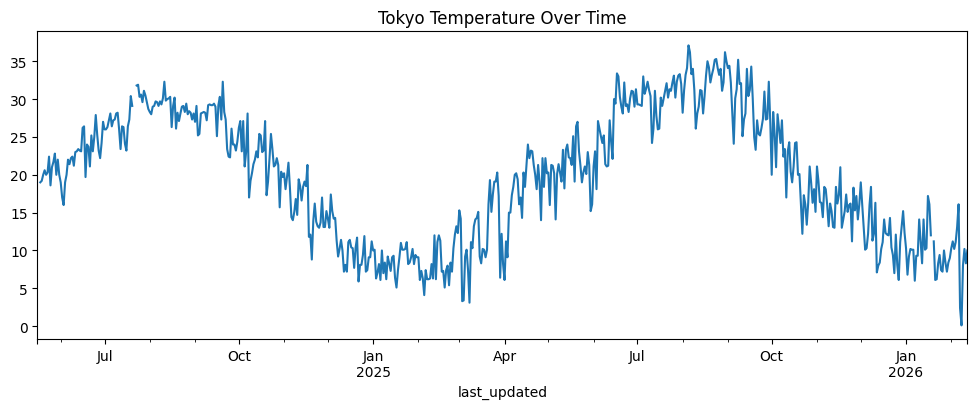

In [4]:
ts = city_df['temperature_celsius'].resample('D').mean()

ts.plot(figsize=(12,4), title="Tokyo Temperature Over Time")


Train/Test split

In [5]:
train = ts[:-30]
test = ts[-30:]


Baseline forecast

In [6]:
import numpy as np

baseline = np.repeat(train.iloc[-1], len(test))


Evaluate baseline

NaNs after fill: 0


<Axes: title={'center': 'Tokyo Daily Temperature (filled)'}, xlabel='last_updated'>

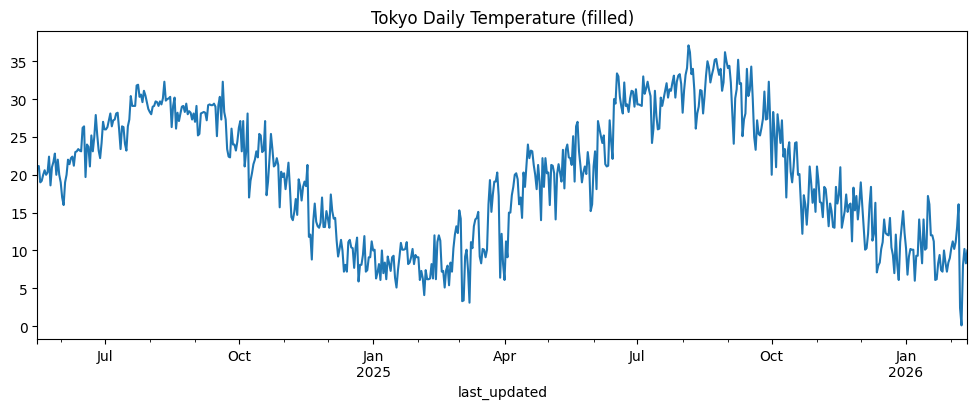

In [9]:
import pandas as pd
import numpy as np

city = "Tokyo"
city_df = df[df["location_name"] == city].copy()

city_df["last_updated"] = pd.to_datetime(city_df["last_updated"])
city_df = city_df.sort_values("last_updated").set_index("last_updated")

# daily mean temp, then fill missing days
ts = city_df["temperature_celsius"].resample("D").mean()
ts = ts.ffill().bfill()   # fills gaps

print("NaNs after fill:", ts.isna().sum())
ts.plot(figsize=(12,4), title="Tokyo Daily Temperature (filled)")


In [10]:
from sklearn.metrics import mean_absolute_error

train = ts.iloc[:-30]
test  = ts.iloc[-30:]

baseline = np.repeat(train.iloc[-1], len(test))

mae_baseline = mean_absolute_error(test.values, baseline)
print("Baseline MAE:", mae_baseline)


Baseline MAE: 4.99


ETS Forecast (Statistical Model)

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit ETS model
ets_model = ExponentialSmoothing(
    train,
    trend="add",
    seasonal=None
).fit()

ets_forecast = ets_model.forecast(len(test))


Evaluate ETS

In [12]:
from sklearn.metrics import mean_absolute_error

mae_ets = mean_absolute_error(test, ets_forecast)
print("ETS MAE:", mae_ets)


ETS MAE: 3.1194556970698497


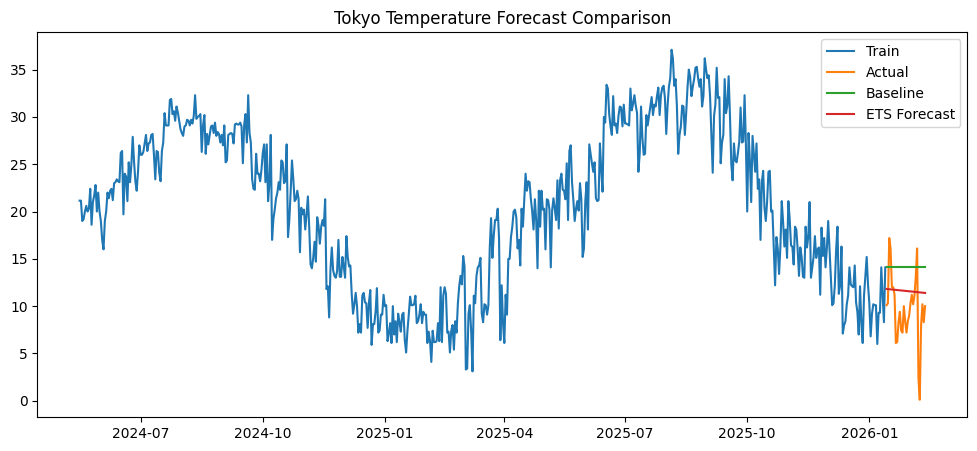

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, baseline, label="Baseline")
plt.plot(test.index, ets_forecast, label="ETS Forecast")

plt.legend()
plt.title("Tokyo Temperature Forecast Comparison")
plt.show()


FINAL STEP — ML Forecasting

Create ML features

In [14]:
ml_df = ts.to_frame(name='temp')

# create lag features
ml_df['lag1'] = ml_df['temp'].shift(1)
ml_df['lag2'] = ml_df['temp'].shift(2)
ml_df['lag7'] = ml_df['temp'].shift(7)

# time features
ml_df['day_of_week'] = ml_df.index.dayofweek
ml_df['month'] = ml_df.index.month

ml_df = ml_df.dropna()
ml_df.head()


,temp,lag1,lag2,lag7,day_of_week,month
last_updated,,,,,,
2024-05-23,20.3,20.0,20.6,21.15,3,5
2024-05-24,22.4,20.3,20.0,21.15,4,5
2024-05-25,18.6,22.4,20.3,19.00,5,5
2024-05-26,21.0,18.6,22.4,19.20,6,5
2024-05-27,21.7,21.0,18.6,20.00,0,5


Train/test split

In [15]:
train_ml = ml_df.iloc[:-30]
test_ml  = ml_df.iloc[-30:]

X_train = train_ml.drop('temp', axis=1)
y_train = train_ml['temp']

X_test = test_ml.drop('temp', axis=1)
y_test = test_ml['temp']


Train ML model (Random Forest)

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

ml_forecast = model.predict(X_test)


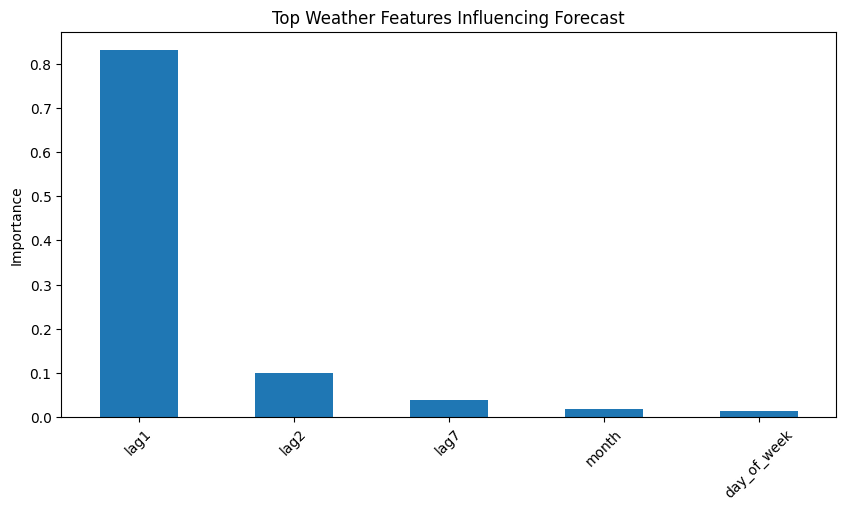

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,5))
importances.head(10).plot(kind='bar')
plt.title("Top Weather Features Influencing Forecast")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


Evaluate ML model

In [17]:
from sklearn.metrics import mean_absolute_error

mae_ml = mean_absolute_error(y_test, ml_forecast)
print("ML MAE:", mae_ml)


ML MAE: 2.4421333333333357


Plot all forecasts

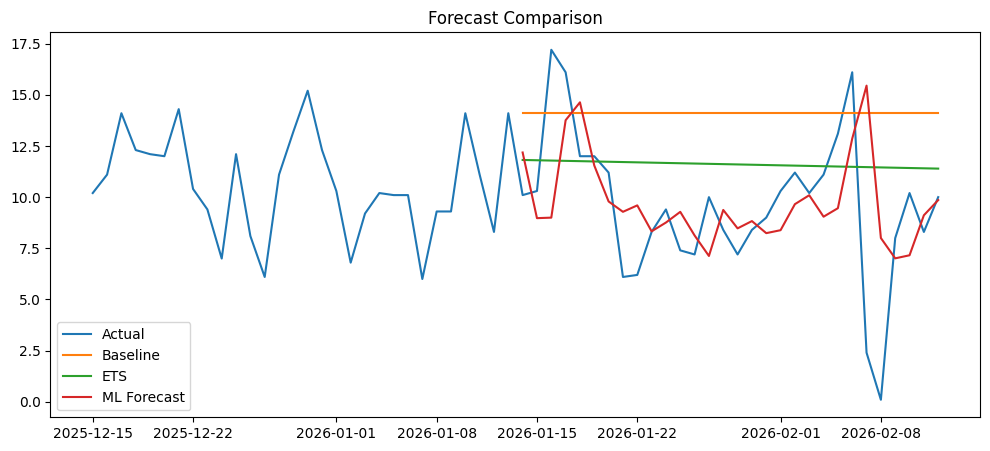

In [18]:
plt.figure(figsize=(12,5))

plt.plot(ts.index[-60:], ts[-60:], label="Actual")
plt.plot(y_test.index, baseline, label="Baseline")
plt.plot(y_test.index, ets_forecast, label="ETS")
plt.plot(y_test.index, ml_forecast, label="ML Forecast")

plt.legend()
plt.title("Forecast Comparison")
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error

mae_ml = mean_absolute_error(y_test, ml_forecast)
print("ML MAE:", mae_ml)


ML MAE: 2.4421333333333357


In [20]:
ensemble = (ets_forecast + ml_forecast) / 2

mae_ensemble = mean_absolute_error(y_test, ensemble)
print("Ensemble MAE:", mae_ensemble)


Ensemble MAE: 2.4610440024726055
